In [1]:
import numpy as np
from scipy.linalg import solve
import matplotlib.pyplot as plt

### General method

We have the following general form for a second-order non-homogeneous O.D.E:

$$
\frac{d^{2}y}{dx^{2}} + P(x)\frac{dy}{dx} + Q(x)y = f(x)
$$

By using forward and backward Tailor expansions, we can get the following:

$$
y(x+\delta x) = y(x) + \delta x \frac{dy}{dx} + \frac{1}{2}\delta x^{2} \frac{d^{2}y}{dx^{2}} + O(\delta x^{3})
$$

$$
y(x-\delta x) = y(x) - \delta x \frac{dy}{dx} + \frac{1}{2}\delta x^{2} \frac{d^{2}y}{dx^{2}} + O(\delta x^{3})
$$

Summing these two equations, we get:


$$
y(x+\delta x) + y(x-\delta x) = 2y(x) + \delta x^{2} \frac{d^{2}y}{dx^{2}} + O(\delta x^{4})
$$

$$
\frac{d^{2}y}{dx^{2}} \approx \frac{y(x+\delta x) - 2y(x)+ y(x-\delta x)}{\delta x^{2}}
$$

$$
\frac{d^{2}y}{dx^{2}} \approx \frac{y_{i+1}-2y_{i}+y_{i-1}}{\delta x^{2}}
$$

Subtracting the same equations, we get:

$$
y(x+\delta x) - y(x-\delta x) = 2\delta x \frac{dy}{dx} + O(\delta x^{3})
$$

$$
\frac{dy}{dx} \approx \frac{y(x+\delta x) - y(x-\delta x)}{2\delta x}
$$

$$
\frac{dy}{dx} \approx \frac{y_{i+1}-y_{i-1}}{2\delta x}
$$

We now have approximations for the first and second derivative terms. We can now substitute them in the original equation:

$$
\frac{y_{i+1}-2y_{i}+y_{i-1}}{\delta x^{2}} + \frac{y_{i+1}-y_{i-1}}{2\delta x} P_{i} + Q_{i}y_{i} = f_{i}
$$

Grouping the $y_{i+1}$, $y_{i}$ and $y_{i-1}$ terms, we get:

$$
\bigg(1 + \frac{\delta x}{2}P_{i}\bigg)y_{i+1} + \bigg(-2 + \delta x^{2}Q_{i}\bigg)y_{i} + \bigg(1-\frac{\delta x}{2}P_{i}\bigg)y_{i-1} = \delta x^{2}f_{i}
$$

In order to represent this as a matrix inversion problem, we need to have all known values on the right-hand side (\textbf{b} vector) and in the matrix \textbf{A} on the left-hand side. We can represent the problem as follows:

\begin{align*}
(1+\frac{\delta x}{2}P_{1})y_{2} + (-2 + \delta x^{2}Q_{1})y_{1} &= -(1-\frac{\delta x}{2}P_{1})y_{0} + \delta x^{2}f(x_{1})\\
(1+\frac{\delta x}{2}P_{2})y_{3} + (-2 + \delta x^{2}Q_{2})y_{2} + (1-\frac{\delta x}{2}P_{2})y_{1} &= \delta x^{2}f(x_{2})\\
\vdots \\
(1+\frac{\delta x}{2}P_{n-2})y_{n-1} + (-2 + \delta x^{2}Q_{n-2})y_{n-2} + (1-\frac{\delta x}{2}P_{n-2})y_{n-3} &= \delta x^{2}f(x_{n-2})\\
(-2 + \delta x^{2}Q_{n-1})y_{n-1} + (1- \frac{\delta x}{2}P_{n-1})y_{n-2} &= \delta x^{2}f(x_{n-1}) - (1 + \frac{\delta x}{2}P_{n-1})y_{n}\\
\end{align*}

Let's define the following variables:

\begin{align*}
a_{i} &:= (1 + \frac{\delta x}{2}P_{i})\\
b_{i} &:= (-2 + \delta x^{2}Q_{i})\\
g_{i} &:= (1 - \frac{\delta x}{2}P_{i})\\
c_{i} &:= \delta x^{2}f(x_{i})
\end{align*}

We can rewrite the system as:

\begin{align*}
b_{1}y_{1} + a_{1}y_{2} &= -g_{1}y_{0}+c_{1}\\
g_{1}y_{1} + b_{2}y_{2} + a_{2}y_{3} &= c_{2}\\
\vdots\\
a_{n-2}y_{n-1} + b_{n-2}y_{n-2} + g_{n-2}y_{n-3} = c_{n-2}\\  
b_{n-1}y_{n-1} + g_{n-1}y_{n-2} &= -a_{n-1}y_{n} + c_{n-1} \\  
\end{align*}

Which in matrix form will be:

\begin{equation}
\textbf{A} = 
\begin{bmatrix}
b_{1} & a_{1} & 0 & 0 & \cdots & 0 & 0 \\
g_{1} & b_{2} & a_{2} & 0 & \cdots & 0& 0  \\
\vdots & \vdots & \vdots & \vdots & & \vdots  & \vdots\\
0 & 0 & 0 & \cdots & a_{n-2} & b_{n-2} & g_{n-2} \\  
0 & 0 & 0 & \cdots & b_{n-1} & g_{n-1} & 0 \\  
\end{bmatrix}
\end{equation}

\begin{equation}
\textbf{x} = 
\begin{bmatrix}
y_{1} \\
y_{2} \\
\vdots\\
y_{n-1} \\
\end{bmatrix}
\end{equation}

\begin{equation}
\textbf{b} = 
\begin{bmatrix}
-g_{1}y_{0} + c_{1} \\
c_{2} \\
c_{3} \\
\vdots\\
c_{n-2} \\
-a_{n-1}y_{n} + c_{n-1} \\
\end{bmatrix}
\end{equation}

The resulting equation is $\textbf{Ax=b}$ and we can solve this using any linear algebra method. 



### Example 1

Let's solve the following O.D.E: 
$$
\frac{d^{2}y}{dx^{2}} + 3\frac{dy}{dx} + 2y = 4x^{2}
$$

With the boundary conditions $y(1)=1$ and $y(2)=6$. We are solving in the interval between $[a,b]$ which in this case is equal to $[1,2]$. We are going to solve using $10,000$ interval points.


In [2]:
a = 1
b = 2
y0 = 1
yn = 6
n = 10000

P = 3
Q = 2

h = (b - a) / n
xi = np.array([a + i*h for i in range(n+1)])

In [3]:
def f(x):
     return 4 * x ** 2

def alpha(h, P):
    return 1 + h/2 * P

def beta(h, Q):
    return -2 + h ** 2 * Q

def gamma(h, P):
    return 1 - h/2 * P

def eta(h, x):
    return h ** 2 * f(x)

In [4]:
# Initialize matrix and vectors

A_matrix = np.zeros((n,n))
w_vector = np.zeros(n)
b_vector = np.zeros(n)

# Set first row

A_matrix[0,0] = beta(h,Q)
A_matrix[0,1] = alpha(h, P)
b_vector[0] = -gamma(h,P) * y0 + eta(h, xi[0])

# Set intermediate rows

for i in np.arange(1, n-1):

    A_matrix[i, i-1] = gamma(h,P)
    A_matrix[i, i] = beta(h,Q)
    A_matrix[i, i+1] = alpha(h, P)

    b_vector[i] =eta(h, xi[i])

# Set last row

A_matrix[-1,-1] = beta(h, P)
A_matrix[-1,-2] = gamma(h,P)

b_vector[-1] =eta(h, xi[-1]) - alpha(h,P) * yn

# Solve system

y = solve(A_matrix, b_vector)


In [5]:
print(y)

[1.00160629 1.00321212 1.00481748 ... 5.99964795 5.99976531 5.99988268]


In this case, since the O.D.E is a simple equation, we can check whether our solution is correct. To do that, we solve the equation analytically. The general, particular and complimentary solutions are given by $y_{g}$, $y_{c}$, and $y_{p}$ respectively:

\begin{align*}
y_{g} &= c_{1}e^{r_{1}x} + c_{2}e^{r_{2}x}\\
y_{c} &= c_{1}e^{-x} + c_{2}e^{-2x}
\end{align*}

where, $r_{1}$ and $r_{2}$ are the roots of the auxilary equation $r^{2}+3r+2=0$.

\begin{align*}
y_{p} = 2x^{2} - 6x + 7
\end{align*}

The final solution is given by:

\begin{equation}
y(x) = 38.231e^{-x} - 118.70e^{-2x} + 2x^{2} - 6x + 7
\end{equation}

In [6]:
def y_func(x):
    term1 = 38.23189732 * np.exp(-x)
    term2 = -118.70318394 * np.exp(-2*x)
    polyterm = 2*x ** 2 - 6*x + 7
    return term1 + term2 + polyterm

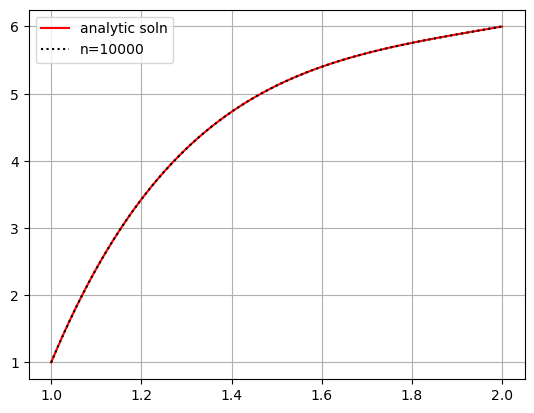

In [7]:
plt.plot(xi, y_func(xi), label='analytic soln', color='red')
plt.plot(xi, np.insert(y, 0, y0), label=f'n={n}', ls=':', color='black', markersize=0.002)
plt.legend()
plt.grid(True)

